In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
def melt_text(keywords):

    keywords["keyword_melted"]=""
    for i in range(len(keywords)):
        j=1
        while j != np.NaN and j<13:
            keyword="Keyword "+str(j)
            keywords["keyword_melted"][i]+=(' '+str(keywords[keyword][i]))
            j+=1
    melted_text=[]
    keywords.to_csv("keyword-clean.csv")
    for i in range(len(keywords)):
        text=keywords["keyword_melted"][i]
        text=text.lower()
        text= re.sub(r'[^\w\s]', '',text)
        text=text.replace("nan","").strip()
        melted_text.append(text)

    
    return melted_text
def create_matrix(all_text="Hello roka".split()):
    cv = CountVectorizer(ngram_range=(1,1)) #created distribution for the network, no stopwords filtering needed these ae all keywords
    X = cv.fit_transform(all_text)
    Xc = (X.T * X) #matrix transformation
    Xc.setdiag(0)
    names = cv.get_feature_names() 
    df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
    df.to_csv('cooc_matrix.csv')
    return df
keywords=pd.read_csv("keyword_data.csv", encoding_errors='ignore')
keywords=keywords.dropna(how='all')
keywords=keywords.reset_index()
texts=melt_text(keywords)
create_matrix(all_text=texts)



,ability,accounting,administration,adoption,advantage,agency,aggression,alliances,allocation,ambivalence,...,valuation,venture,violence,wage,wages,wealth,women,work,workflow,workplace
ability,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,2,0,1
accounting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
administration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
adoption,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
advantage,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wealth,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
women,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
work,2,2,0,0,0,0,3,0,0,1,...,0,0,4,0,0,0,4,0,0,6
workflow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Above dataframe describes the adjacency matrix for the keywords in each article. The way that is done is that it first extracts all the keywords in each article and saves it in a list. Saves all the keywords as a list of list and performs distribution 

Visual representation of the network is a good indication that alot of the words are used commonly across different articles. 

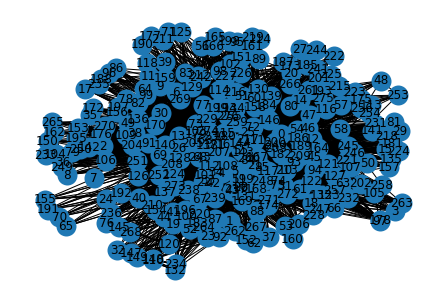

In [59]:
import pandas as pd
import scipy as sp
import networkx as nx
import numpy as np
matrix=pd.read_csv("cooc_matrix.csv")
adjmatrix=matrix.to_numpy()

matrix_x=[]
for i in range(len(adjmatrix)):
    matrix_y=[]
    y_axis=str(adjmatrix[i]).split()
    for j in range(1,len(y_axis)):
        matrix_y.append(int(y_axis[j].replace(']',"")))
    matrix_x.append(matrix_y)
G=nx.from_numpy_matrix(np.array(matrix_x))
nx.draw(G, with_labels=True, node_size=100, alpha=1, linewidths=10)

Top 10 nodes by degree, strength and node pairs and weights . The high strength indicates the extreme common usage and the high weights indicate these words are being used across articles

In [60]:
deg=list(G.degree(weight=1))
deg.sort(key=lambda a:a[1],reverse=True)
print("Top 10 nodes in degree:\n",deg[0:10])

Top 10 nodes in degree:
 [(171, 240), (144, 235), (16, 205), (111, 169), (115, 157), (21, 151), (205, 142), (55, 140), (143, 135), (167, 134)]


In [56]:
strength=list(G.degree(weight='weight'))
strength.sort(key=lambda a:a[1],reverse=True)
print("Top 10 nodes in strength:\n",strength[0:10])


Top 10 nodes in strength:
 [(144, 1712), (171, 1514), (111, 624), (16, 601), (21, 545), (115, 519), (194, 386), (205, 375), (55, 366), (180, 361)]


In [57]:
edges=list(G.edges.data("weight",default=1))
edges.sort(key=lambda a:a[2],reverse=True)
print("Top 10 nodes pairs in weights:\n",edges[0:10])

Top 10 nodes pairs in weights:
 [(144, 171, 109), (16, 171, 64), (115, 144, 52), (111, 144, 51), (115, 171, 49), (16, 144, 47), (144, 180, 44), (68, 171, 40), (111, 171, 40), (144, 217, 38)]


Overall positive correlation between avg strength and degree. While weak, it is probably nonlinear.

[Text(0.5, 1.0, 'scatter plot for avg strength vs avg degree')]

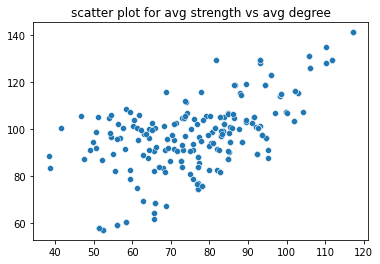

In [51]:
import seaborn as sns

avgstrength=nx.average_neighbor_degree(G,weight="weight")

avgdeg=nx.average_neighbor_degree(G,weight=1)

sns.scatterplot(x=avgdeg,y=avgstrength).set(title="scatter plot for avg strength vs avg degree")

In [17]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
def create_word_frequency(tweetfile,year):
    stop_words=set(stopwords.words('english'))
    entire_stopword=""

    for i in range(len(tweetfile)):
        tweetfile["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweetfile["tweet"][i])
        tweetfile["tweet"][i]= re.sub(r'[^\w\s]', '', tweetfile["tweet"][i])
        word_tokens=word_tokenize(tweetfile["tweet"][i])
        nostop=[w for w in word_tokens if not w.lower() in stop_words]
        tweetfile["tweet"][i]=' '.join(nostop)
        entire_stopword+=tweetfile["tweet"][i]
    entire_stopword=entire_stopword.translate(str.maketrans('','',string.punctuation))
    counted = Counter(entire_stopword.split())

    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_freq.to_csv("freq/"+year+"-freq.csv")
    return word_freq


In [4]:
years=["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
for i in years:
    print(i,"loading")
    elon=create_word_frequency(pd.read_csv("tweets/"+i+".csv"),i)

2020 loading
2021 loading
2022 loading


,Unnamed: 0,word,frequency
0,43,many,3
1,182,Voltaire,2
2,150,Harris,2
3,40,lot,2
4,101,better,2
5,46,need,2
6,144,death,2
7,115,thoughts,2
8,2,know,2
9,158,good,2


[Text(0.5, 1.0, 'Word frequency for 2011 elon tweets')]

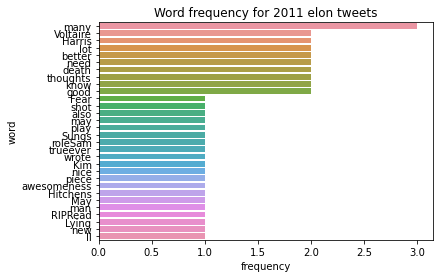

In [18]:
elon_2011=create_word_frequency(pd.read_csv("tweets/2011.csv"),"2011")
display(pd.read_csv("freq/2011-freq.csv").head(10))
sns.barplot(x='frequency',y='word',data=elon_2011.head(30)).set(title="Word frequency for 2011 elon tweets")

,Unnamed: 0,word,frequency
0,7,rocket,23
1,39,Model,19
2,38,Tesla,17
3,53,Space,14
4,305,amp,14
5,18,SpaceX,12
6,424,Dragon,11
7,210,good,11
8,220,people,11
9,425,Station,10


[Text(0.5, 1.0, 'Word frequency for 2012 elon tweets')]

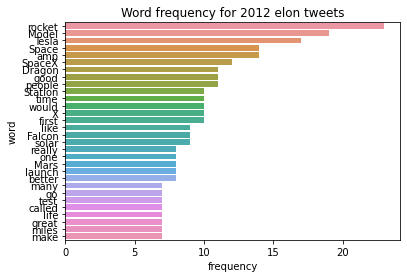

In [19]:
elon=pd.read_csv("freq/2012-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2012 elon tweets")

,Unnamed: 0,word,frequency
0,119,Tesla,70
1,149,amp,54
2,31,rocket,49
3,52,Model,44
4,44,good,29
5,56,w,28
6,93,like,27
7,91,launch,23
8,370,Dragon,22
9,299,time,22


[Text(0.5, 1.0, 'Word frequency for 2013 elon tweets')]

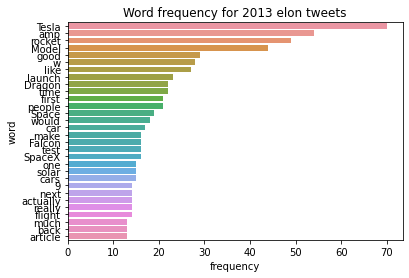

In [20]:
elon=pd.read_csv("freq/2013-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2013 elon tweets")

,Unnamed: 0,word,frequency
0,62,Tesla,88
1,121,amp,70
2,146,rocket,57
3,265,Model,54
4,530,good,37
5,35,like,35
6,295,w,35
7,65,launch,31
8,89,Dragon,31
9,175,Falcon,29


[Text(0.5, 1.0, 'Word frequency for 2014 elon tweets')]

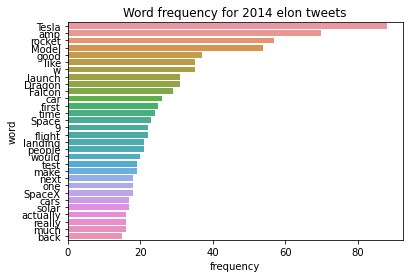

In [21]:
elon=pd.read_csv("freq/2014-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2014 elon tweets")

,Unnamed: 0,word,frequency
0,62,Tesla,105
1,24,amp,88
2,57,rocket,74
3,631,Model,61
4,47,good,52
5,379,like,46
6,56,launch,42
7,3,landing,38
8,35,w,38
9,16,Falcon,37


[Text(0.5, 1.0, 'Word frequency for 2015 elon tweets')]

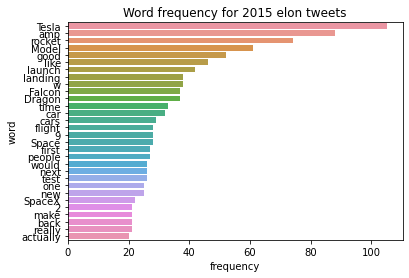

In [22]:
elon=pd.read_csv("freq/2015-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2015 elon tweets")

,Unnamed: 0,word,frequency
0,371,Tesla,154
1,339,amp,123
2,86,Model,92
3,203,rocket,89
4,41,like,78
5,1361,good,67
6,460,launch,51
7,60,car,50
8,1097,Falcon,49
9,62,w,48


[Text(0.5, 1.0, 'Word frequency for 2016 elon tweets')]

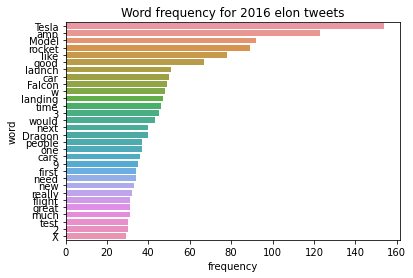

In [23]:
elon=pd.read_csv("freq/2016-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2016 elon tweets")

,Unnamed: 0,word,frequency
0,112,amp,210
1,99,Tesla,206
2,52,Model,136
3,34,like,122
4,181,rocket,116
5,61,good,88
6,48,next,80
7,478,car,79
8,53,3,78
9,177,launch,75


[Text(0.5, 1.0, 'Word frequency for 2017 elon tweets')]

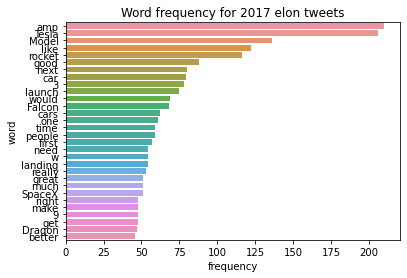

In [24]:
elon=pd.read_csv("freq/2017-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2017 elon tweets")

,Unnamed: 0,word,frequency
0,17,amp,522
1,1,Tesla,228
2,102,car,101
3,124,3,97
4,90,like,83
5,123,Model,82
6,589,people,57
7,277,would,56
8,799,make,55
9,53,next,53


[Text(0.5, 1.0, 'Word frequency for 2018 elon tweets')]

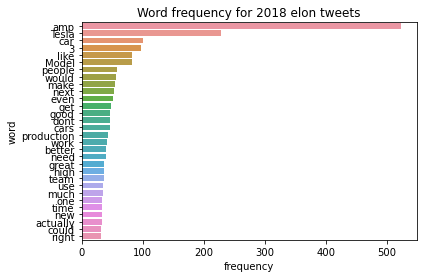

In [25]:
elon=pd.read_csv("freq/2018-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2018 elon tweets")

,Unnamed: 0,word,frequency
0,8,amp,1194
1,199,Tesla,617
2,758,like,267
3,1223,Model,263
4,223,car,230
5,163,3,229
6,267,would,192
7,498,next,177
8,43,good,174
9,1237,rocket,163


[Text(0.5, 1.0, 'Word frequency for 2019 elon tweets')]

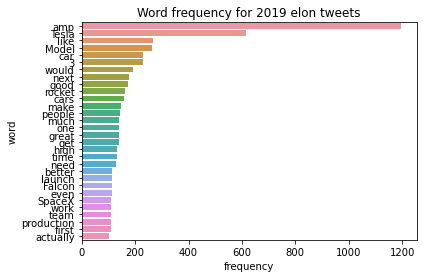

In [26]:
elon=pd.read_csv("freq/2019-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2019 elon tweets")

,Unnamed: 0,word,frequency
0,30,amp,1790
1,10,Tesla,746
2,70,like,337
3,218,Model,285
4,219,3,266
5,377,would,264
6,67,car,264
7,189,much,229
8,45,good,229
9,165,make,211


[Text(0.5, 1.0, 'Word frequency for 2020 elon tweets')]

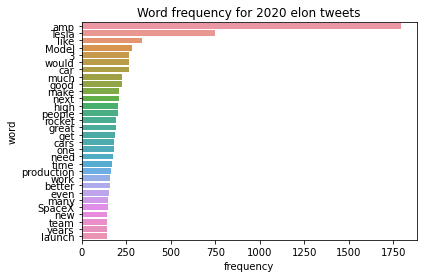

In [27]:
elon=pd.read_csv("freq/2020-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2020 elon tweets")

,Unnamed: 0,word,frequency
0,31,amp,470
1,47,Tesla,142
2,139,would,75
3,106,like,71
4,191,much,69
5,979,high,59
6,434,production,57
7,30,time,56
8,276,work,56
9,23,next,54


[Text(0.5, 1.0, 'Word frequency for 2021 elon tweets')]

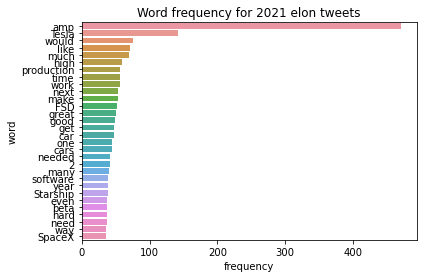

In [28]:
elon=pd.read_csv("freq/2021-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2021 elon tweets")

,Unnamed: 0,word,frequency
0,41,amp,80
1,60,Tesla,32
2,52,people,26
3,238,one,20
4,67,make,20
5,57,would,18
6,149,car,18
7,48,Starlink,18
8,324,good,16
9,13,time,16


[Text(0.5, 1.0, 'Word frequency for 2022 elon tweets')]

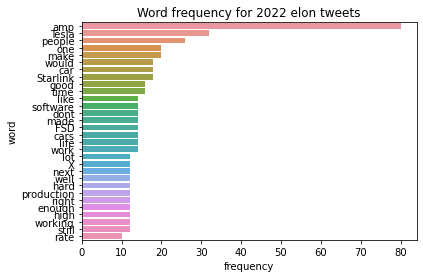

In [29]:
elon=pd.read_csv("freq/2022-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2022 elon tweets")

2020 for Elon musk was when he tweeted the most. About over 11,000 tweets were made during this year, probably because he was bored from covid. His word usage was predominantly Tesla related and their high single letter usage are probably for describing the tesla model released at that time. I expected elon to have a high mention of twitter but it seems like that came too late for it to matter.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import scipy.stats as ss
import numpy as np
import itertools
from nltk.corpus import wordnet
def create_word_zipf(tweetfile,year):
    stop_words=set(stopwords.words('english'))
    entire_stopword=""

    for i in range(len(tweetfile)):
        tweetfile["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweetfile["tweet"][i])
        tweetfile["tweet"][i]= re.sub(r'[^\w\s]', '', tweetfile["tweet"][i])
        word_tokens=word_tokenize(tweetfile["tweet"][i])
        nostop=[w for w in word_tokens if not w.lower() in stop_words]
        tweetfile["tweet"][i]=' '.join(nostop)
        entire_stopword+=tweetfile["tweet"][i]
    entire_stopword=entire_stopword.translate(str.maketrans('','',string.punctuation))
    counted = Counter(entire_stopword.split())

    tweets = [[w, c] for [w, c] in counted.items()] 
    freq_rank = ss.rankdata([c for [w, c] in tweets])
    for i in range(len(tweets)):
        tweets[i].append(freq_rank[i])
    word_rank = pd.DataFrame(tweets,columns=['word','frequency','rankdata'])
    word_rank['log_freq']=np.log(word_rank['frequency'])
    word_rank['log_rank']=np.log(word_rank['rankdata'])
    word_rank.to_csv("zipf/rankdata"+year+".csv")
    return word_rank


In [2]:
years=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
for i in years:
    print(i,"loading")
    elon=create_word_zipf(pd.read_csv("tweets/"+i+".csv"),i)

2011 loading
2012 loading
2013 loading
2014 loading
2015 loading
2016 loading
2017 loading
2018 loading
2019 loading
2020 loading
2021 loading
2022 loading


[Text(0.5, 1.0, 'Log log plot for zipf for 2011 elon tweets')]

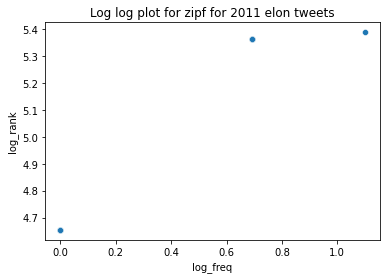

In [5]:
elon=pd.read_csv("zipf/rankdata2011.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2011 elon tweets")

We did not take any 2010 data because he made no meaningful tweets in 2010. The one tweet he made inn 2010 has no text to work off of. He made 20 tweets in 2011, and since then his twitter usage has skyrocketed in an exponential rate peaking the highest at 2020. The plots indicate that the log log zipf relationship is logarithmic.

[Text(0.5, 1.0, 'Log log plot for zipf for 2012 elon tweets')]

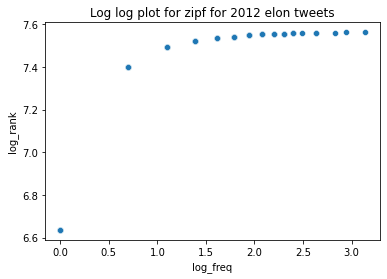

In [6]:
elon=pd.read_csv("zipf/rankdata2012.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2012 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2013 elon tweets')]

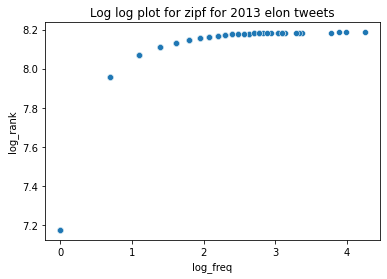

In [7]:
elon=pd.read_csv("zipf/rankdata2013.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2013 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2014 elon tweets')]

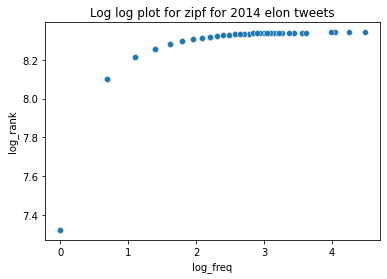

In [8]:
elon=pd.read_csv("zipf/rankdata2014.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2014 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2015 elon tweets')]

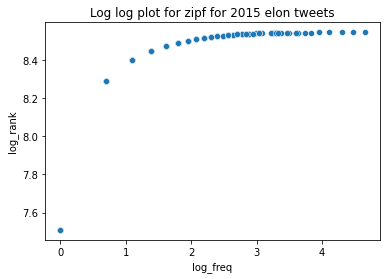

In [9]:
elon=pd.read_csv("zipf/rankdata2015.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2015 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2016 elon tweets')]

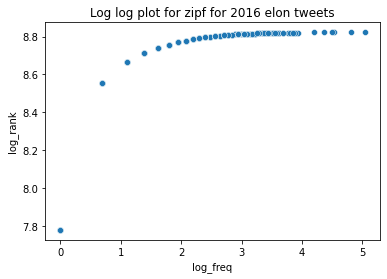

In [10]:
elon=pd.read_csv("zipf/rankdata2016.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2016 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2017 elon tweets')]

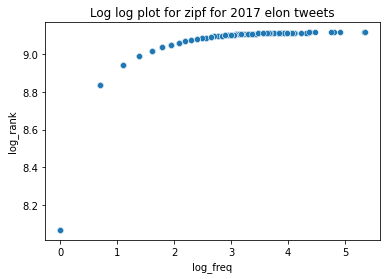

In [11]:
elon=pd.read_csv("zipf/rankdata2017.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2017 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2018 elon tweets')]

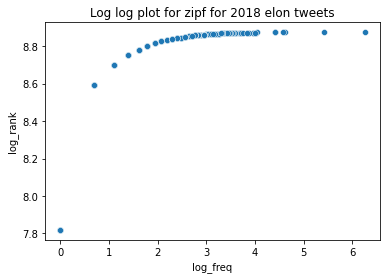

In [12]:
elon=pd.read_csv("zipf/rankdata2018.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2018 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2019 elon tweets')]

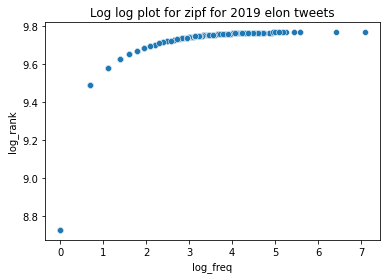

In [13]:
elon=pd.read_csv("zipf/rankdata2019.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2019 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2020 elon tweets')]

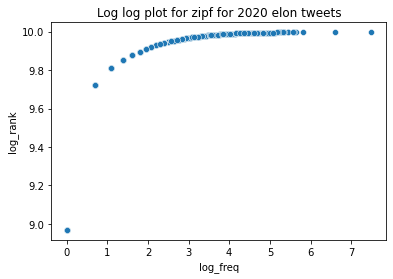

In [14]:
elon=pd.read_csv("zipf/rankdata2020.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2020 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2021 elon tweets')]

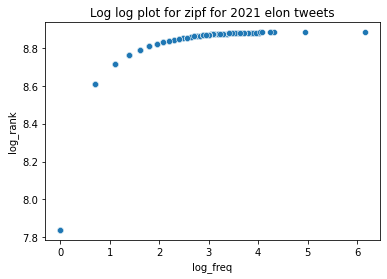

In [15]:
elon=pd.read_csv("zipf/rankdata2021.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2021 elon tweets")

In [ ]:
elon=pd.read_csv("zipf/rankdata2022.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2022 elon tweets")